#                                Multilinear Regression

### 1.importing data

### 2.getting data ready

### 3.checking linearity
    + pairplot

### 4.correlation analysis
    + correlation (relation between x and y)
      ++ (point to notice - 1 : is there any relation between x and x) 
    + building model (trial mode)
      ++ (point to notice - 2 : rquared, AIC, p-value, adj_rsquared)
    
### 5.dealing with problematic columns 
    + a-1) checking if x and x have good correlation then can we drop one of them
      a-2) is p-value significant or not
           (checking how individual feature affecting the model prediction)
    + multicollinearity (VIF)
    + error / residue handing
    + improving model (trial mode)
    
### 6.dealing with problematic rows
    + checking influential points (cook's distance)
    + improving model (trial mode)

### 7.final model
    + fitting
    + testing
    + prediction


    
    
   


In [203]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### 1.Importing data

In [204]:
data = pd.read_csv("50_startups.csv") #reading csv file
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 2.1 getting data ready

In [205]:
# data.shape               #it tells about no. of records and features
# data.columns             #determines column names
# data.dtypes              #checking data types
# data.isna().sum()        #checking --- is there any null value or not

In [206]:
data.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [207]:
data['State']=data['State'].astype('category') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


In [208]:
# data1=pd.get_dummies(data,columns=['State'])        #transformations of categorical data using get_dummies
# data1.info()

In [209]:
from sklearn import preprocessing                  #transformations of categorical data using LabelEncoder
le = preprocessing.LabelEncoder()
data['State'] = le.fit_transform(data['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [210]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 5)

In [211]:
data.rename({'Administration': 'admn'}, axis=1,inplace=True)
data.rename({'R&D Spend': 'rds'}, axis=1,inplace=True)
data.rename({'Marketing Spend': 'mkts'}, axis=1,inplace=True)
data.rename({'State': 'st'}, axis=1,inplace=True)
data.rename({'Profit': 'profit'}, axis=1,inplace=True)

In [212]:
data.describe()

,rds,admn,mkts,st,profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


### 2.2 outlier detection

In [217]:
#find outliers for each column (dependent and independent)
#might be a chance some value may be entered wrongly in a particular column
#thats we need to check outliers for suspected columns

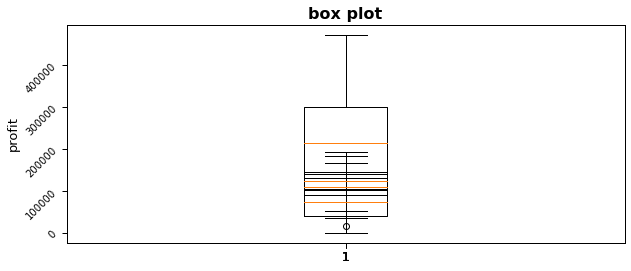

In [218]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("profit", fontsize = 13 )                                          #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


plt.boxplot(x='profit', data=data)                                          #box plot
# plt.boxplot(x='rds', data=data)                                            #box plot
# plt.boxplot(x='admn', data=data)                                           #box plot
# plt.boxplot(x='mkts', data=data)                                           #box plot


plt.show()                                                                   #print/display the plot
#plt.savefig("Used Cars Bar.png")                                            #to create a .png file of our plot

In [138]:
print(np.where(data['profit']<25000))

(array([49], dtype=int64),)


In [139]:
data.loc[[49]]

,rds,admn,mkts,st,profit
49,0.0,116983.8,45173.06,0,14681.4


In [140]:
data.drop(labels=49, axis=0,inplace=True)
data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rds     49 non-null     float64
 1   admn    49 non-null     float64
 2   mkts    49 non-null     float64
 3   st      49 non-null     int32  
 4   profit  49 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 2.1 KB


### 3.Checking linearity

#### a) pairplot

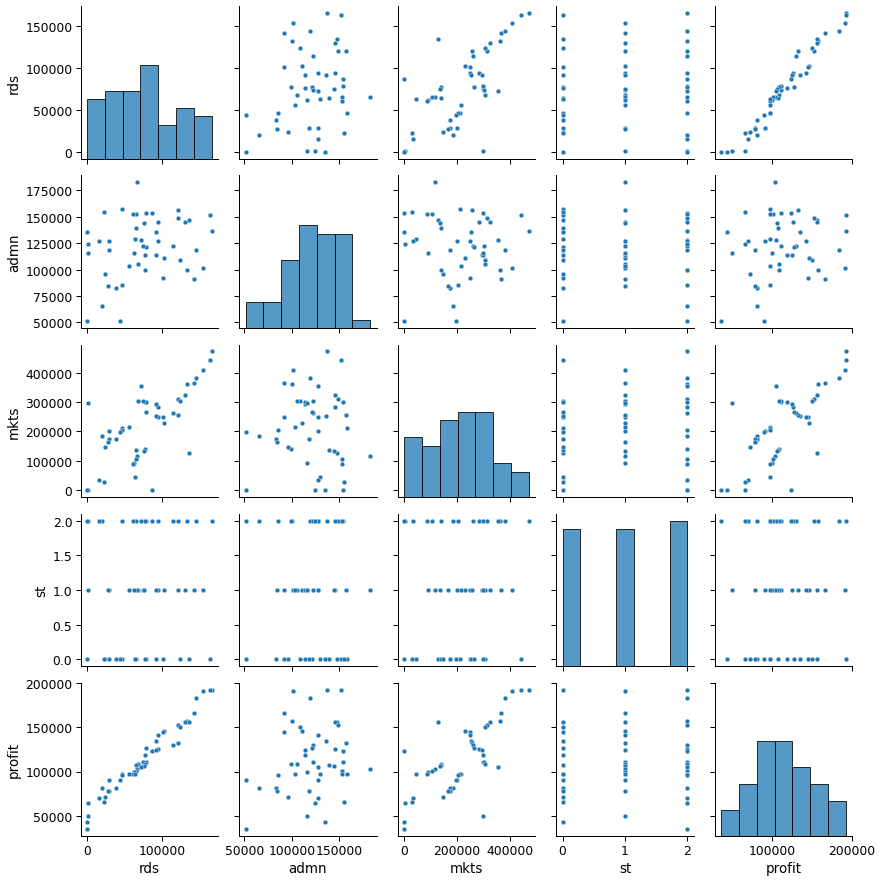

In [141]:
sns.pairplot(data)

#### b)heatmap

<AxesSubplot:>

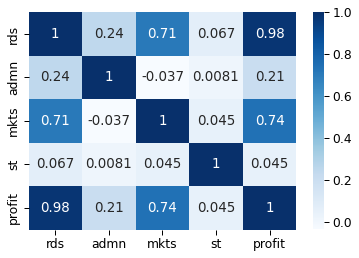

In [142]:
sns.set_context('paper', font_scale=1.4)
correlation = data.corr()

sns.heatmap(correlation, 
            annot=True, 
            cmap='Blues'
           )

### 4.Correlation analysis

#### a)correlation

In [143]:
data.corr()                     #there should be good correlation between x and y
                                #and there should be no or less correlation between x and x

,rds,admn,mkts,st,profit
rds,1.000000,0.243438,0.711654,0.067359,0.978437
admn,0.243438,1.000000,-0.037280,0.008080,0.205841
mkts,0.711654,-0.037280,1.000000,0.045313,0.739307
st,0.067359,0.008080,0.045313,1.000000,0.044876
profit,0.978437,0.205841,0.739307,0.044876,1.000000


In [144]:
#relation between profit and some other feature is good enough to build model
#lets make the model and analyse it

#relation between rds and mkts is not bad - [we will analyse it later - in next part]

#### b)building model (trial 1)

In [145]:
import statsmodels.formula.api as sms
model = sms.ols('profit~rds+admn+mkts+st',data=data).fit()           
print(model.summary())

#we get good value for R-squared
#
#null hypothesis : beta_1 (coeff. of x's) = 0
#alternate hypothesis : beta_1 != 0
#p-low  null-go , hence null hypothesis rejected and alternate hypothesis accepted it means there is a relation between x and y
#but if null hypothesis is accepted it means coeff. of that x's feature has no effect while predicting y 
#
#here we find that p - high null - accepted ; 
#hence Administration , Marketing_spend , State has no effect while predicting y   but we couldn't believe it, we want to check it out 

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.45e-30
Time:                        06:03:53   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.332e+04   5726.740      9.311      0.0

In [146]:
#Rsquared is good 
#p-value for admn, mkts and st is not significant [we will analyse it later - in next part]

### 5. dealing with problematic columns

#### a-1)dealing with x-values which have good correlation

In [147]:
#there is good correlation between rds-mkts 
#lets analyse it

In [149]:
import statsmodels.formula.api as sms
m1 = sms.ols("profit~rds",data=data).fit() 
m2 = sms.ols("profit~mkts",data=data).fit()
m3 = sms.ols("profit~rds+mkts",data=data).fit()
print(m1.rsquared,m1.pvalues)
print(m2.rsquared,m2.pvalues)
print(m3.rsquared,m3.pvalues)   

#out of 100% rds predict 95% and mkts predict 54%
#and together predict 96% 
#also they have significant p-values
#hence we cannot drop one of them
#i.e. we have to consider both the features while predicting model.

0.9573395972488337 Intercept    2.221695e-27
rds          7.555104e-34
dtype: float64
0.5465748398585546 Intercept    5.905020e-11
mkts         1.304853e-09
dtype: float64
0.9610856807456628 Intercept    1.970460e-25
rds          3.628510e-26
mkts         4.084443e-02
dtype: float64


#### a-2) dealing with insignificant p-values

In [150]:
#p-value for admn, mkts and st is not significant, lets analyse these features

In [152]:
import statsmodels.formula.api as sms
m4 = sms.ols("profit~admn",data=data).fit() 
m5 = sms.ols("profit~mkts",data=data).fit()
m6 = sms.ols("profit~st",data=data).fit()
m7 = sms.ols("profit~admn+mkts+st",data=data).fit()
print(m4.rsquared,m4.pvalues)
print(m5.rsquared,m5.pvalues)
print(m6.rsquared,m6.pvalues) 
print(m7.rsquared,m7.pvalues)


#out of 100% admn predict 4% and mkts predict 55% and st predict 0.2%. after combined they predict 60% 
#but here we find that all the features have significant p-values except admn 
#i can think about droping st and admn

0.04237035844418102 Intercept    0.001618
admn         0.155918
dtype: float64
0.5465748398585546 Intercept    5.905020e-11
mkts         1.304853e-09
dtype: float64
0.0020138343042078732 Intercept    7.554823e-17
st           7.594712e-01
dtype: float64
0.6012099504380133 Intercept    1.686461e-01
admn         1.694657e-02
mkts         4.392011e-10
st           9.234023e-01
dtype: float64


#### b) multicollinearity (VIF)

In [153]:
#For vif we only talk about x-values
#high vif implies high Rsquared implies high correlation 
#and here we talk about x-value, so we need less correlation between them and hence need less vif
import statsmodels.formula.api as smf

rsq_rds=smf.ols('rds~admn+mkts+st',data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_admn=smf.ols('admn~rds+mkts+st',data=data).fit().rsquared
vif_admn=1/(1-rsq_admn)

rsq_mkts=smf.ols('mkts~rds+admn+st',data=data).fit().rsquared
vif_mkts=1/(1-rsq_mkts)

rsq_st=smf.ols('st~rds+admn+mkts',data=data).fit().rsquared
vif_st=1/(1-rsq_st)

# storing VIF in a DataFrame
d1={'Variables':['rds','admn','mkts','st'],
    'Vif':[vif_rds,vif_admn,vif_mkts,vif_st]}
Vif_df=pd.DataFrame(d1)
Vif_df

#we get no relation between x-values

,Variables,Vif
0,rds,2.383743
1,admn,1.175295
2,mkts,2.240058
3,st,1.004678


#### C) error / residue handling 

#### c-1)test for normality of residuals (Q-Q Plot)

In [154]:
model.resid

0      2393.040988
1      3170.084182
2     10354.001883
3     11305.942866
4     -4786.673858
5     -4716.472807
6     -2687.579088
7     -3675.788197
8      1785.509452
9     -5530.440582
10    10555.232529
11     7755.162504
12    12188.712492
13     5521.735422
14   -16760.184312
15   -15121.598089
16     8565.445824
17    -4103.168152
18    -4901.769752
19     7066.102872
20      388.713918
21    -5636.653632
22    -4907.712615
23    -1877.272952
24    -4563.604545
25     3032.022401
26    -5832.233405
27    -8942.467383
28      260.844527
29    -1087.120005
30     -730.447774
31     -634.009701
32    -3879.813692
33    -2181.803081
34     5221.881256
35     5748.175012
36    13672.776591
37    -1743.162524
38    10802.091952
39    -5095.319440
40      685.234067
41     1337.107654
42    -1924.730275
43     8188.851661
44    -2743.727856
45    15507.397571
46    -8762.080831
47    -7711.860567
48   -14968.372510
dtype: float64

D:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


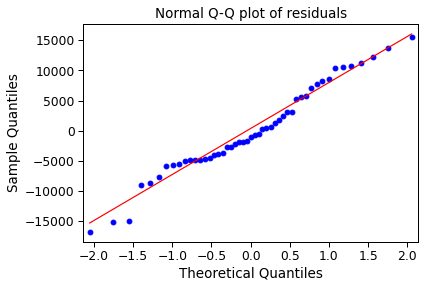

In [155]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [156]:
list(np.where(model.resid<-16000))         #these might cause problem while predicting [we will handle these later]

[array([14], dtype=int64)]

#### c-2)Residual Plot for Homoscedasticity

In [157]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

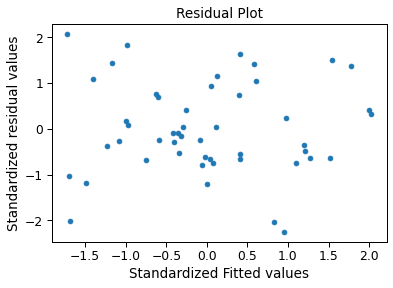

In [158]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [159]:
#checking variance of error :
#we get most of the error lies between -2 and 2 and it is a good thing

#### c-3)Residual Vs Regressors

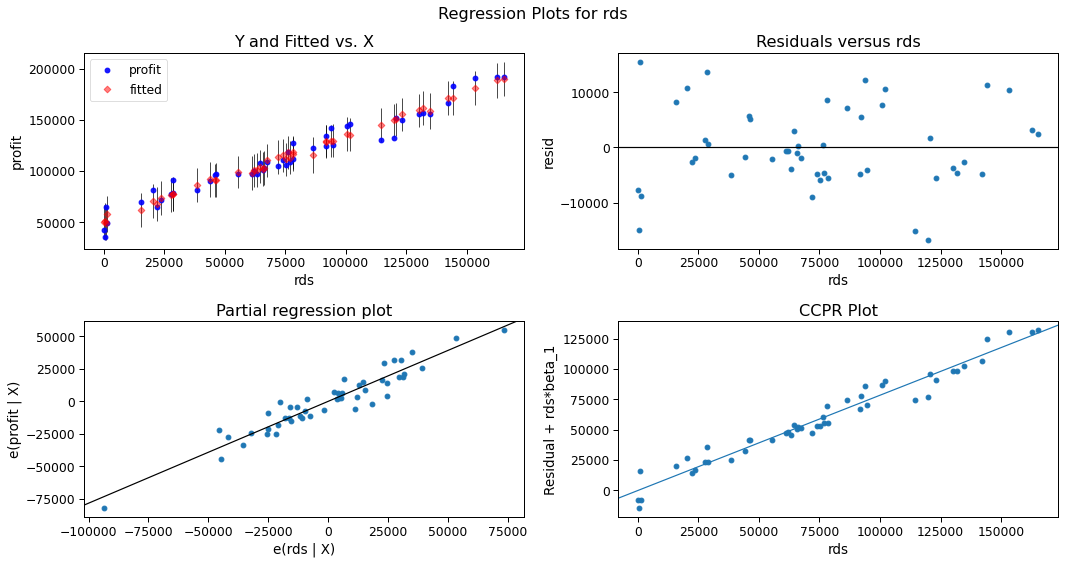

In [160]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rds", fig=fig)
plt.show()

#partial regression plot : if we get a slent line then adding this feature to the model will cause
#changes in the model. if we get a straight line then it means adding this feature will not change
#the model.

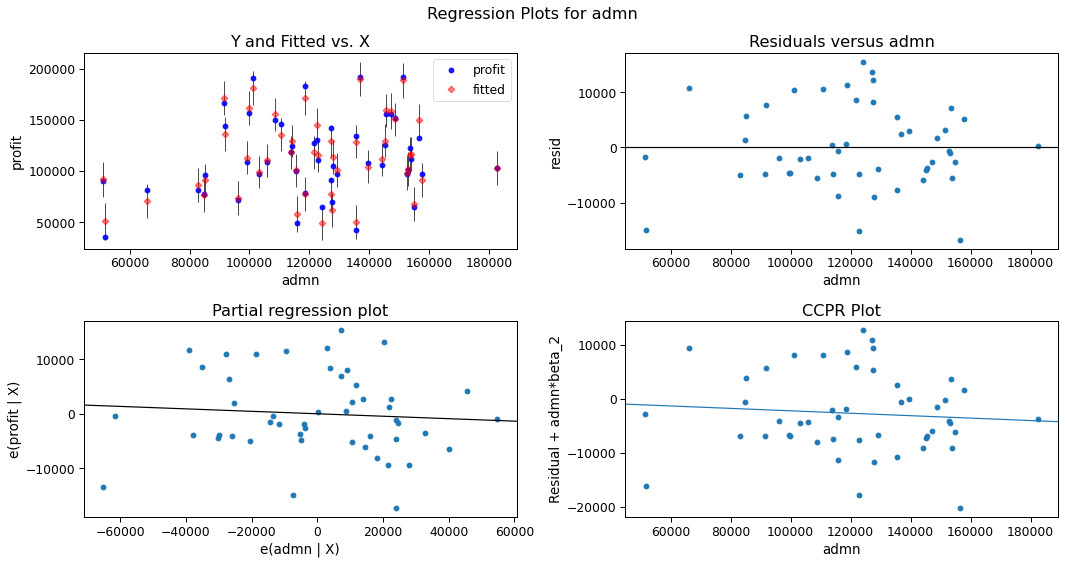

In [161]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admn", fig=fig)
plt.show()

#partial regression plot has a slight slent line

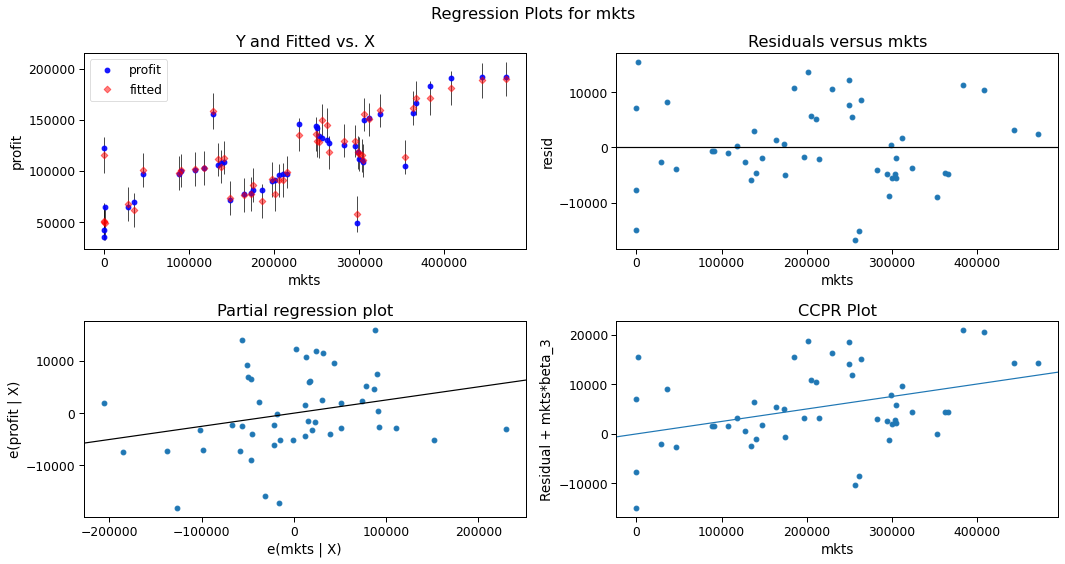

In [162]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mkts", fig=fig)
plt.show()

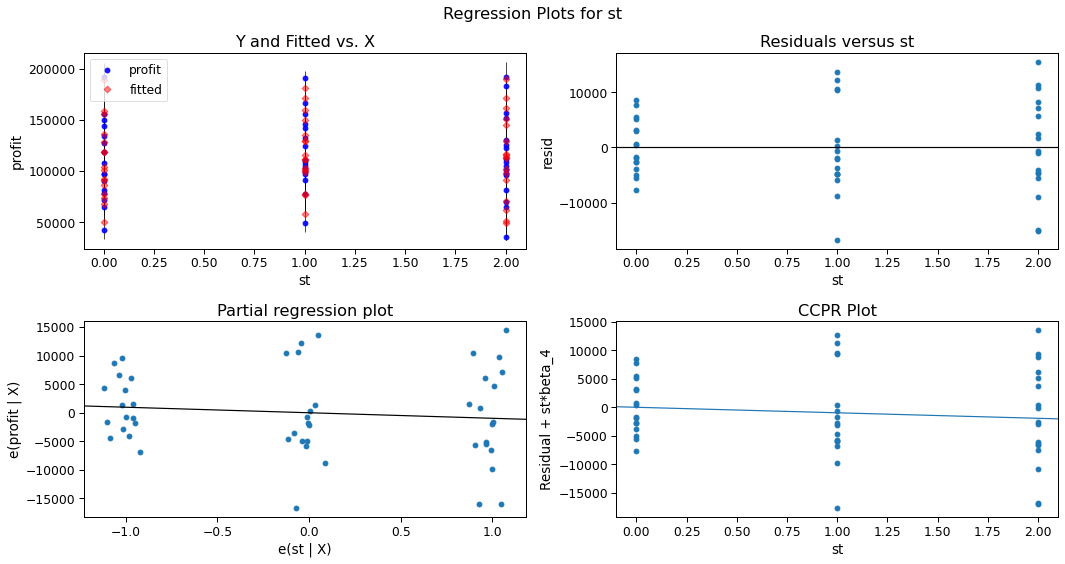

In [163]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "st", fig=fig)
plt.show()

In [164]:
#there is slent line for  admn i can't think about dropping it

#there is almost straight line for st
#also there is 0.9 p-value for st 
#again we find that it predict 0.2% out 100% 
#so i am dropping st

#### d)improving model

In [165]:
data=data.drop('st',axis=1)
data.head()

,rds,admn,mkts,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [166]:
import statsmodels.formula.api as sms
model1 = sms.ols('profit~rds+admn+mkts',data=data).fit()           
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           8.85e-32
Time:                        06:08:42   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.0

In [168]:
#rsquared remain same 
#AIC is reduced by 1 unit

#admn and mkts have insignificant p-values

#iterate the part - 5 again

#### d-a1) dealing with x-values which have good correlation

In [169]:
data.corr()

,rds,admn,mkts,profit
rds,1.000000,0.243438,0.711654,0.978437
admn,0.243438,1.000000,-0.037280,0.205841
mkts,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


In [170]:
#there is good correlation between rds-mkts 
#lets analyse it

In [172]:
import statsmodels.formula.api as sms
m8 = sms.ols("profit~rds",data=data).fit() 
m9 = sms.ols("profit~mkts",data=data).fit()
m10 = sms.ols("profit~rds+mkts",data=data).fit()
print(m8.rsquared,m8.pvalues)
print(m9.rsquared,m9.pvalues)
print(m10.rsquared,m10.pvalues)   

#out of 100% rds predict 95% and mkts predict 54%
#and together predict 96% 
#also they have significant p-values
#hence we cannot drop one of them
#i.e. we have to consider both the features while predicting model.

0.9573395972488337 Intercept    2.221695e-27
rds          7.555104e-34
dtype: float64
0.5465748398585546 Intercept    5.905020e-11
mkts         1.304853e-09
dtype: float64
0.9610856807456628 Intercept    1.970460e-25
rds          3.628510e-26
mkts         4.084443e-02
dtype: float64


#### d-a2) dealing with insignificant p-values

In [173]:
#admn and mkts have insignificant p-values. lets analyse these 

In [175]:
import statsmodels.formula.api as sms
m11 = sms.ols("profit~admn",data=data).fit() 
m12 = sms.ols("profit~mkts",data=data).fit()
m13 = sms.ols("profit~admn+mkts",data=data).fit()
print(m11.rsquared,m11.pvalues)
print(m12.rsquared,m12.pvalues)
print(m13.rsquared,m13.pvalues)   

#out of 100% admn predict 4% and mkts predict 54%
#and together predict 60% 
#admn can't have significant p-value

0.04237035844418102 Intercept    0.001618
admn         0.155918
dtype: float64
0.5465748398585546 Intercept    5.905020e-11
mkts         1.304853e-09
dtype: float64
0.6011271008483877 Intercept    1.472650e-01
admn         1.572324e-02
mkts         2.695219e-10
dtype: float64


#### d-b) multicollinearity (VIF)

In [176]:
#For vif we only talk about x-values
#high vif implies high Rsquared implies high correlation 
#and here we talk about x-value, so we need less correlation between them and hence need less vif
import statsmodels.formula.api as smf

rsq_rds_1=smf.ols('rds~admn+mkts',data=data).fit().rsquared
vif_rds_1=1/(1-rsq_rds_1)

rsq_admn_1=smf.ols('admn~rds+mkts',data=data).fit().rsquared
vif_admn_1=1/(1-rsq_admn_1)

rsq_mkts_1=smf.ols('mkts~rds+admn',data=data).fit().rsquared
vif_mkts_1=1/(1-rsq_mkts_1)


# storing VIF in a DataFrame
d2={'Variables':['rds','admn','mkts'],
    'Vif':[vif_rds_1,vif_admn_1,vif_mkts_1]}
Vif_df_1=pd.DataFrame(d2)
Vif_df_1

#we get no relation between x-values

,Variables,Vif
0,rds,2.377754
1,admn,1.175172
2,mkts,2.239957


#### d-c1)test for normality of residuals (Q-Q Plot)

In [177]:
model1.resid

0      1545.153001
1      4254.937773
2     10474.863604
3     10440.845358
4     -4675.546721
5     -5591.463177
6     -1618.828633
7     -3595.135318
8       882.943059
9     -4476.886778
10    10614.157318
11     8786.544379
12    12229.920551
13     6527.220861
14   -16692.754796
15   -16020.901975
16     9555.302079
17    -5038.256295
18    -4862.334457
19     6135.856879
20     1376.298134
21    -6597.999038
22    -4895.967796
23    -1869.149045
24    -5499.033877
25     4006.285615
26    -5814.098935
27    -9907.855026
28      255.150566
29    -2052.981761
30     -718.820227
31    -1604.653693
32    -2897.901335
33    -2183.383136
34     6160.492191
35     4770.221328
36    13627.635745
37     -773.363244
38     9796.038044
39    -4141.615646
40     1614.399697
41     1306.684825
42     -993.904974
43     7166.930282
44    -1825.401107
45    14468.782794
46    -8847.693625
47    -6816.046655
48   -15984.686812
dtype: float64

D:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


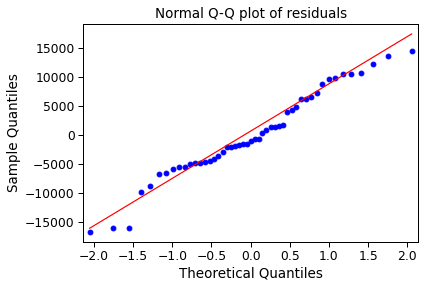

In [92]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [179]:
list(np.where(model1.resid<-16500))         #these might cause problem while predicting [we will handle these later]

[array([14], dtype=int64)]

#### d-c2)Residual Plot for Homoscedasticity

In [180]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

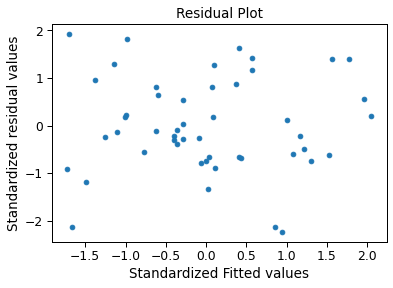

In [181]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [182]:
#checking variance of error :
#we get most of the error lies between -2 and 2 and it is a good thing

#### d-c3)Residual Vs Regressors

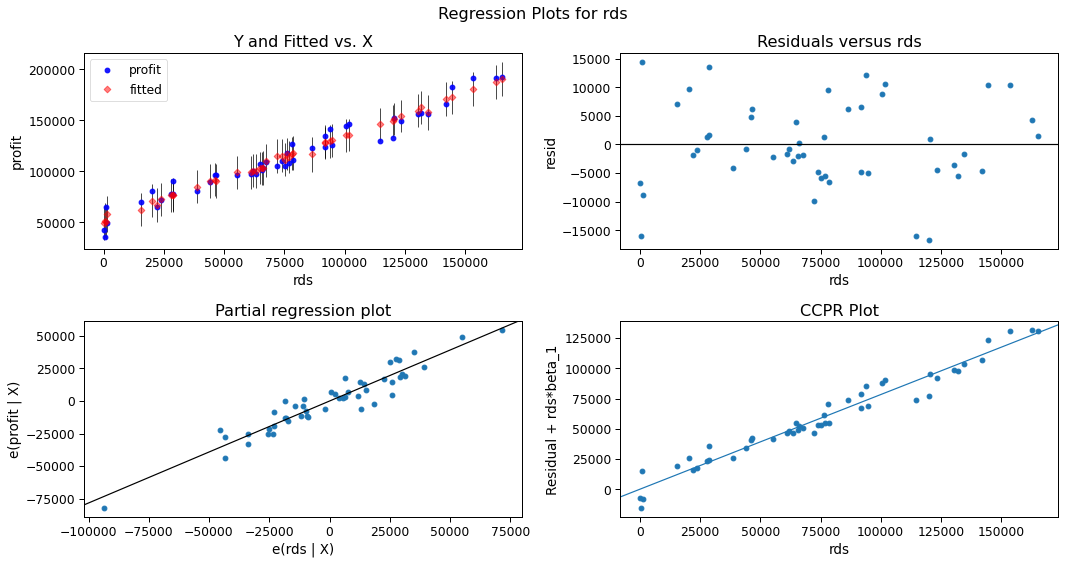

In [183]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "rds", fig=fig)
plt.show()

#partial regression plot : if we get a slent line then adding this feature to the model will cause
#changes in the model. if we get a straight line then it means adding this feature will not change
#the model.

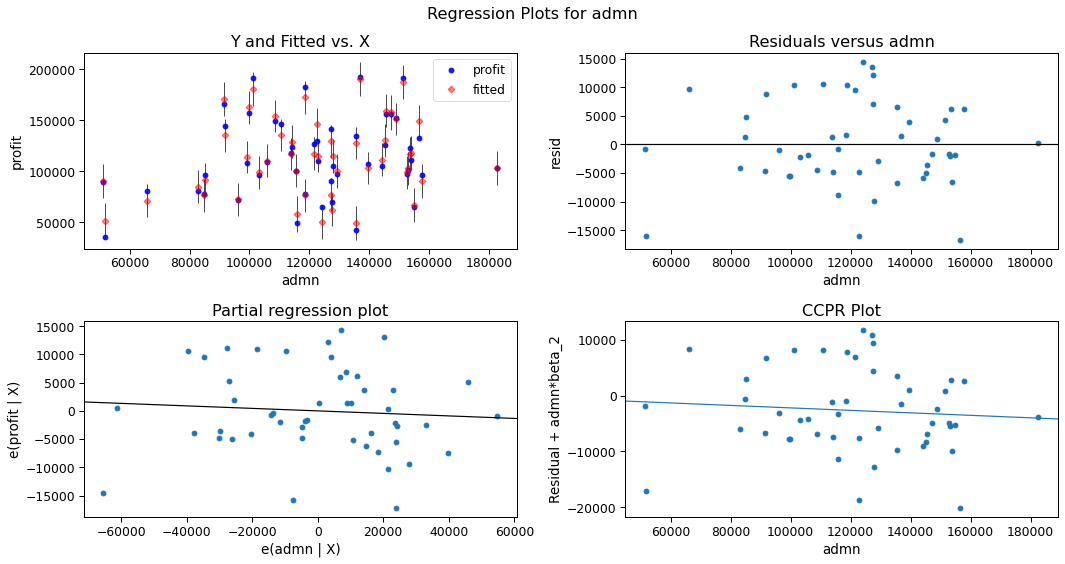

In [184]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "admn", fig=fig)
plt.show()

#for partial regression plot we have very slightly slent line

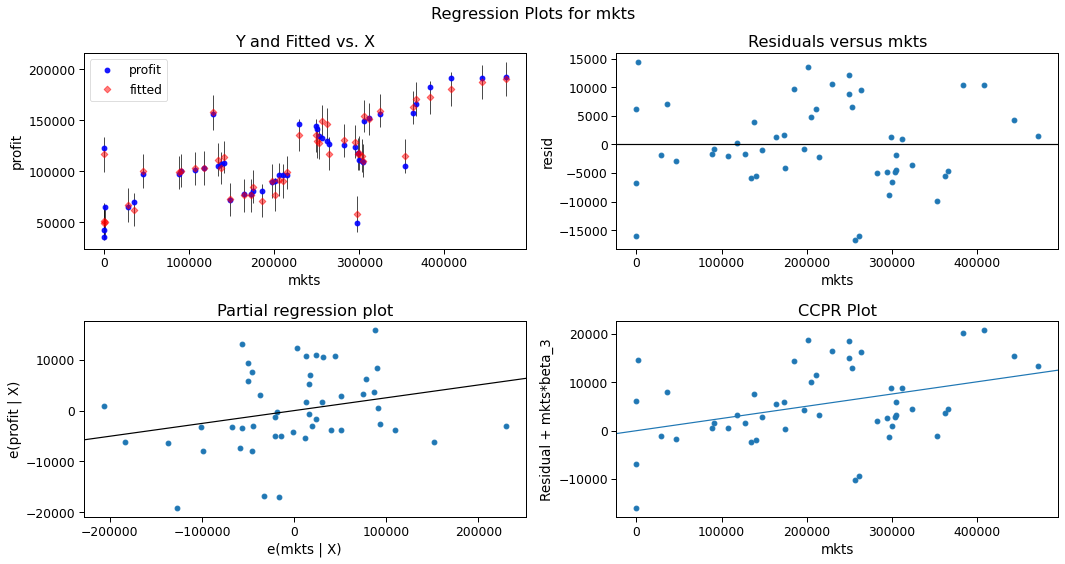

In [185]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "mkts", fig=fig)
plt.show()

#### d-d)improving model

In [186]:
#admn has insignificant p-value
#admn predict only 4%
#for admn we get slightly slent line

#i can think about droping it

In [187]:
import statsmodels.formula.api as sms
model2 = sms.ols('profit~rds+mkts',data=data).fit()           
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           3.74e-33
Time:                        06:13:38   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.0

### 6. Dealing with problematic rows

#### a)checking influential points

showing first highly influential point


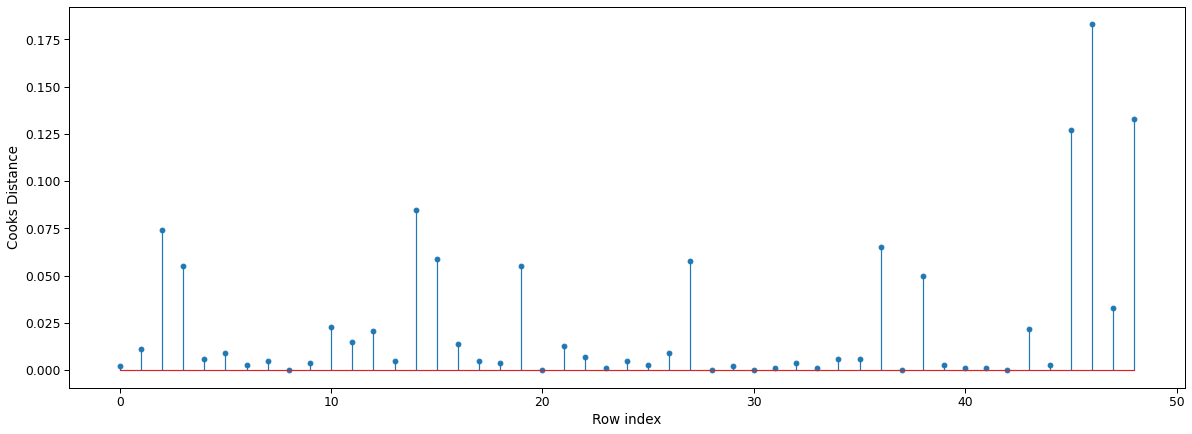

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rds     49 non-null     float64
 1   admn    49 non-null     float64
 2   mkts    49 non-null     float64
 3   profit  49 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


,rds,admn,mkts,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [188]:
import statsmodels.formula.api as smf 
model_outlier = smf.ols('profit~rds+mkts',data=data).fit()

model_influence = model_outlier.get_influence()
(c , _) = model_influence.cooks_distance

print("showing first highly influential point")
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#loop for droping the first influential point and detecting and droping rest of influential points
while np.max(c)>1 :
    print("point having cook's distance > 1 is : ")
    print(np.argmax(c), np.max(c))
    data=data.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
   
    model_oulier = smf.ols('profit~rds+admn+mkts',data=data).fit()
    model_influence = model_outlier.get_influence()
    (c , _) = model_influence.cooks_distance
    if np.max(c) < 1:
        print(np.argmax(c), np.max(c),"it is not a influential point") 
        print("now all the influential points are droped out")
        break      
    
data.info()
data.head()

In [189]:
#there is no influential point 

#### b) records with high residue

In [190]:
list(np.where(model2.resid<-16500)) 

[array([14], dtype=int64)]

In [191]:
data=data.drop(data.index[14],axis=0).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rds     48 non-null     float64
 1   admn    48 non-null     float64
 2   mkts    48 non-null     float64
 3   profit  48 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


#### c) improving model

In [192]:
import statsmodels.formula.api as sms
model3 = sms.ols('profit~rds+mkts',data=data).fit()           
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     627.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.38e-33
Time:                        06:14:45   Log-Likelihood:                -493.67
No. Observations:                  48   AIC:                             993.3
Df Residuals:                      45   BIC:                             999.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.969e+04   2228.391     22.299      0.0

In [193]:
#rsquared improved
#all features have significant p-values
#AIC decreased

### 7. Final model (fitting of multilinear regression)

### a) ols method (using statmodels package)

#### a-1) model building

In [194]:
import statsmodels.formula.api as sms
final_model = sms.ols('profit~rds+mkts',data=data).fit()           
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     627.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.38e-33
Time:                        06:15:25   Log-Likelihood:                -493.67
No. Observations:                  48   AIC:                             993.3
Df Residuals:                      45   BIC:                             999.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.969e+04   2228.391     22.299      0.0

In [195]:
#This is our final model with 96.5% accuracy. 

#### a-2)prediction for new values

In [196]:
val_pred=pd.DataFrame({'rds':70000,'mkts':140000},index=[0])
val_pred

,rds,mkts
0,70000,140000


In [197]:
final_model.predict(val_pred)

0    108374.959978
dtype: float64

## Model Comparison

In [198]:
m_comp={'models':['model','model1','model2','final_model'],'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared,final_model.rsquared]}
result=pd.DataFrame(m_comp)
result

,models,Rsquared
0,model,0.961758
1,model1,0.961316
2,model2,0.961086
3,final_model,0.965359
